In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from libra_py import units

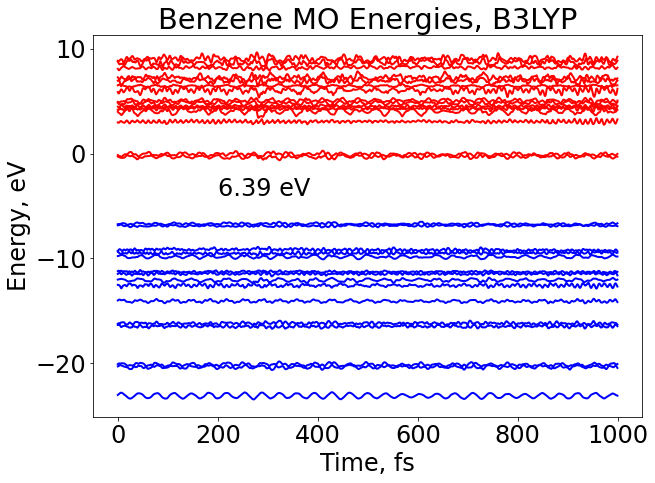

In [3]:
%matplotlib inline
fs = 24
time_step = 0.5 # fs
plt.rcParams.update({'font.size': fs})
plt.figure(figsize=(3.21*3, 2.41*3))

energies = []
for step in range(1000,3000):
    tmp = np.diag(sp.load_npz(f"res/E_ks_{step}.npz").real.todense())
    tmp = tmp[0:int(tmp.shape[0]/2)] # Only the energies of alpha orbitals
    energies.append(tmp)
energies = np.array(energies)*units.au2ev

md_time = np.arange(len(energies))*time_step
for i in range(energies.shape[1]):
    if i<15:
        plt.plot(md_time, energies[:,i], lw=2.0, color='blue')
    else:
        plt.plot(md_time, energies[:,i], lw=2.0, color='red')
# The HOMO level index is 14
ave_gap = np.average(energies[:,15]-energies[:,14])
plt.text(200, -4.0, f'{ave_gap:.2f} eV')
plt.title('Benzene MO Energies, B3LYP')
plt.ylabel('Energy, eV')
plt.xlabel('Time, fs')
plt.tight_layout()
plt.savefig('ml_energy_levels.jpg', dpi=600)